# Mining information from Text Data 

This project will explore and analyze the information stored in a particular dataset. In this case the ACL Anthology dataset (https://aclanthology.org/). We will explore different techniques for obtaining valuable information.

## Finding Similar Items

Randomly select 1000 abstracts from the whole dataset. Find the similar items using pairwise Jaccard similarities, MinHash and LSH (vectorized versions) .

   1. Compare the performance in time and the results for *k*-shingles = 3, 5 and 10, for the three methods and similarity thresholds *s*=0.1 and 0.2. Use 50 hashing functions.
      
   2. Compare the results obtained for MinHash and LSH for different similarity thresholds *s* = 0.1, 0.2, and 0.25  and 50, 100 and 200 hashing functions.
   
   3. For MinHashing using 100 hashing functions and *s* = 0.1, and 0,2, find the Jaccard distances (1-Jaccard similarity) for all possible pairs.
 

In [803]:
from urllib.request import urlopen
from io import BytesIO
import gzip

import time
import bibtexparser
import pandas as pd
import numpy as np
import re
import binascii
import itertools

### Download the anthology+abstract file. As the file is in bib form, we later use bibtexparser to parse the file

In [1]:
url = 'https://aclanthology.org/anthology+abstracts.bib.gz'
with gzip.open(BytesIO (urlopen(url).read()), 'rb') as fb:
    with open('anthology.bib', 'wb') as f:
        f.write(fb.read())

file = open('anthology.bib')
for n in range (30):
    print(file.readline()[:-1])

@proceedings{woah-2021-online,
    title = "Proceedings of the 5th Workshop on Online Abuse and Harms (WOAH 2021)",
    editor = "Mostafazadeh Davani, Aida  and
      Kiela, Douwe  and
      Lambert, Mathias  and
      Vidgen, Bertie  and
      Prabhakaran, Vinodkumar  and
      Waseem, Zeerak",
    month = aug,
    year = "2021",
    address = "Online",
    publisher = "Association for Computational Linguistics",
    url = "https://aclanthology.org/2021.woah-1.0",
}
@inproceedings{singh-li-2021-exploiting,
    title = "Exploiting Auxiliary Data for Offensive Language Detection with Bidirectional Transformers",
    author = "Singh, Sumer  and
      Li, Sheng",
    booktitle = "Proceedings of the 5th Workshop on Online Abuse and Harms (WOAH 2021)",
    month = aug,
    year = "2021",
    address = "Online",
    publisher = "Association for Computational Linguistics",
    url = "https://aclanthology.org/2021.woah-1.1",
    doi = "10.18653/v1/2021.woah-1.1",
    pages = "1--5",
    abstra

In [246]:
with open('anthology.bib') as bibtex_file:
    bib_database = bibtexparser.bparser.BibTexParser(common_strings=True).parse_file(bibtex_file)

In [706]:
print(bib_database.entries[:2])

[{'url': 'https://aclanthology.org/2021.woah-1.0', 'publisher': 'Association for Computational Linguistics', 'address': 'Online', 'year': '2021', 'month': 'August', 'editor': 'Mostafazadeh Davani, Aida  and\nKiela, Douwe  and\nLambert, Mathias  and\nVidgen, Bertie  and\nPrabhakaran, Vinodkumar  and\nWaseem, Zeerak', 'title': 'Proceedings of the 5th Workshop on Online Abuse and Harms (WOAH 2021)', 'ENTRYTYPE': 'proceedings', 'ID': 'woah-2021-online'}, {'abstract': 'Offensive language detection (OLD) has received increasing attention due to its societal impact. Recent work shows that bidirectional transformer based methods obtain impressive performance on OLD. However, such methods usually rely on large-scale well-labeled OLD datasets for model training. To address the issue of data/label scarcity in OLD, in this paper, we propose a simple yet effective domain adaptation approach to train bidirectional transformers. Our approach introduces domain adaptation (DA) training procedures to AL

In [248]:
bib_df = pd.DataFrame(bib_database.entries)

In [249]:
bib_df.head()

,url,publisher,address,year,month,editor,title,ENTRYTYPE,ID,abstract,pages,doi,booktitle,author,volume,journal,language,number,isbn,note
0,https://aclanthology.org/2021.woah-1.0,Association for Computational Linguistics,Online,2021,August,"Mostafazadeh Davani, Aida and\nKiela, Douwe ...",Proceedings of the 5th Workshop on Online Abus...,proceedings,woah-2021-online,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,https://aclanthology.org/2021.woah-1.1,Association for Computational Linguistics,Online,2021,August,NaN,Exploiting Auxiliary Data for Offensive Langua...,inproceedings,singh-li-2021-exploiting,Offensive language detection (OLD) has receive...,1--5,10.18653/v1/2021.woah-1.1,Proceedings of the 5th Workshop on Online Abus...,"Singh, Sumer and\nLi, Sheng",NaN,NaN,NaN,NaN,NaN,NaN
2,https://aclanthology.org/2021.woah-1.2,Association for Computational Linguistics,Online,2021,August,NaN,Modeling Profanity and Hate Speech in Social M...,inproceedings,hahn-etal-2021-modeling,Hate speech and profanity detection suffer fro...,6--16,10.18653/v1/2021.woah-1.2,Proceedings of the 5th Workshop on Online Abus...,"Hahn, Vanessa and\nRuiter, Dana and\nKleinba...",NaN,NaN,NaN,NaN,NaN,NaN
3,https://aclanthology.org/2021.woah-1.3,Association for Computational Linguistics,Online,2021,August,NaN,{H}ate{BERT}: Retraining {BERT} for Abusive La...,inproceedings,caselli-etal-2021-hatebert,"We introduce HateBERT, a re-trained BERT model...",17--25,10.18653/v1/2021.woah-1.3,Proceedings of the 5th Workshop on Online Abus...,"Caselli, Tommaso and\nBasile, Valerio and\nM...",NaN,NaN,NaN,NaN,NaN,NaN
4,https://aclanthology.org/2021.woah-1.4,Association for Computational Linguistics,Online,2021,August,NaN,Memes in the Wild: Assessing the Generalizabil...,inproceedings,kirk-etal-2021-memes,Hateful memes pose a unique challenge for curr...,26--35,10.18653/v1/2021.woah-1.4,Proceedings of the 5th Workshop on Online Abus...,"Kirk, Hannah and\nJun, Yennie and\nRauba, Pa...",NaN,NaN,NaN,NaN,NaN,NaN


In [250]:
bib_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 74430 entries, 0 to 74429
Data columns (total 20 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   url        74430 non-null  object
 1   publisher  63460 non-null  object
 2   address    66669 non-null  object
 3   year       74430 non-null  object
 4   month      66411 non-null  object
 5   editor     1612 non-null   object
 6   title      74430 non-null  object
 7   ENTRYTYPE  74430 non-null  object
 8   ID         74430 non-null  object
 9   abstract   30587 non-null  object
 10  pages      57848 non-null  object
 11  doi        27984 non-null  object
 12  booktitle  69847 non-null  object
 13  author     71552 non-null  object
 14  volume     2319 non-null   object
 15  journal    2538 non-null   object
 16  language   3029 non-null   object
 17  number     1834 non-null   object
 18  isbn       1405 non-null   object
 19  note       200 non-null    object
dtypes: object(20)
memory usage: 

### Extract the abstract column for preprocessing, i.e. removing the empty abstracts, very short abstracts and abstracts that are non latin

In [251]:
abstract = bib_df['abstract'].dropna()

In [252]:
minimum = 200
example = 0

count = {'empty': 0,
        f'short(< {minimum} char)': 0,
        'non latin': 0,
        'other': 0}

for a in abstract:
    if len(a) == 0:
        count['empty'] += 1
    elif len(re.findall('[a-zA-Z]',a )) < .2*len(a):
        count['non latin'] += 1
        if example < 2:
            print (a, '\n')
            example += 1
    elif len(a) < minimum:
        count[f'short(< { minimum} char)'] += 1
    else:
        count['other'] += 1
    
for k, v in count.items():
    print(f'{k:>20}', f'{v:>6}')

{``}在汉语等其他有省略代词习惯的语言中,通常会删掉可从上下文信息推断出的代词。尽管以Transformer为代表的的神经机器翻译模型取得了巨大的成功,但这种省略现象依旧对神经机器翻译模型造成了很大的挑战。本文在Transformer基础上提出了一个融合零指代识别的翻译模型,并引入篇章上下文来丰富指代信息。具体地,该模型采用联合学习的框架,在翻译模型基础上,联合了一个分类任务,即判别句子中省略代词在句子所表示的成分,使得模型能够融合零指代信息辅助翻译。通过在中英对话数据集上的实验,验证了本文提出方法的有效性,与基准模型相比,翻译性能提升了1.48个BLEU值。{''} 

{``}机器译文自动评价对机器翻译的发展和应用起着重要的促进作用,它一般通过计算机器译文和人工参考译文的相似度来度量机器译文的质量。该文通过跨语种预训练语言模型XLM将源语言句子、机器译文和人工参考译文映射到相同的语义空间,结合分层注意力和内部注意力提取源语言句子与机器译文、机器译文与人工参考译文以及源语言句子与人工参考译文之间差异特征,并将其融入到基于Bi-LSTM神经译文自动评价方法中。在WMT{'}19译文自动评价数据集上的实验结果表明,融合XLM词语表示的神经机器译文自动评价方法显著提高了其与人工评价的相关性。{''} 

               empty    109
   short(< 200 char)     57
           non latin    145
               other  30276


In [253]:
for i in abstract.index:
    if len(abstract[i]) < 200:
        abstract = abstract.drop(labels=i)

In [254]:
for i in abstract.index:
    if len(re.findall('[a-zA-Z]', abstract[i])) < .2*len(abstract[i]):
        abstract = abstract.drop(labels=i)

### Choose randomly 1000 abstracts for testing

In [255]:
abstract_sample = abstract.sample(n=1000, random_state=1)

### Define the function to get shingles of the abstracts

In [328]:
def get_shingles(abstract, k):

    L = len(abstract)
    shingles = set() 
    
    for i in range(L-k+1):
        shingle = abstract[i:i+k]
        crc = binascii.crc32(shingle.encode('utf-8')) 
        shingles.add(crc)
          
    return shingles

### Finding similar abstracts using pairwise jaccard similarity approach

#### Define the function to calculate the jaccard similarity score between two items

In [318]:
def jaccard_similarity_score(x, y):
    """
    Jaccard Similarity J (A,B) = | Intersection (A,B) | /
                                    | Union (A,B) |
    """
    intersection_cardinality = len(set(x).intersection(set(y)))
    union_cardinality = len(set(x).union(set(y)))
    return intersection_cardinality / float(union_cardinality)

0.028311425682507583

#### Find the similar items using pairwise jaccard similarities with k_shingles=3

In [319]:
support_threshold = [0.1, 0.2]
k = 3

start = time.time()
for s in support_threshold:
    candidates = []
    for pair in itertools.combinations(abstract_sample, 2):
        js = jaccard_similarity_score(get_shingles(pair[0], k),get_shingles(pair[1], k))
        
        if js > s:
            candidates.append(pair)
    print('Time elapsed after the function: {}s'.format(round(time.time()-start),2))
    print('Number of similar items for k=3: {} with threshold s: {}'.format(len(candidates), s))

Time elapsed after the function: 238s
Number of similar items for k=3: 495420 with threshold s: 0.1
Time elapsed after the function: 499s
Number of similar items for k=3: 300548 with threshold s: 0.2


#### Find the similar items using pairwise Jaccard similarities with k_shingles=5

In [320]:
support_threshold = [0.1, 0.2]
k = 5

start = time.time()
for s in support_threshold:
    candidates = []
    for pair in itertools.combinations(abstract_sample, 2):
        js = jaccard_similarity_score(get_shingles(pair[0], k),get_shingles(pair[1], k))
        
        if js > s:
            candidates.append(pair)
    print('Time elapsed after the function: {}s'.format(round(time.time()-start),2))
    print('Number of similar items for k=5: {} with threshold s:{}'.format(len(candidates), s))

Time elapsed after the function: 262s
Number of similar items for k=5: 3866 with threshold s:0.1
Time elapsed after the function: 486s
Number of similar items for k=5: 4 with threshold s:0.2


#### Find the similar items using pairwise Jaccard similarities with k_shingles=10

In [707]:
support_threshold = [0.1, 0.2]
k = 10

start = time.time()
for s in support_threshold:
    candidates = []
    for pair in itertools.combinations(abstract_sample, 2):
        js = jaccard_similarity_score(get_shingles(pair[0], k),get_shingles(pair[1], k))
        
        if js > s:
            candidates.append(pair)
    print('Time elapsed after the function: {} s'.format(round(time.time()-start),2))
    print('Number of similar items for k=10: {} with threshold s: {}'.format(len(candidates), s))

Time elapsed after the function: 230 s
Number of similar items for k=10: 2 with threshold s: 0.1
Time elapsed after the function: 459 s
Number of similar items for k=10: 1 with threshold s: 0.2


### Finding similar abstracts using minhashing approach (for 50 hashing functions)

#### Setting factors of 50 hashing functions for minhashing function

In [331]:
#bands = 10
#rows = 5
nsig_50 = 50 # number of random hashing functions

maxShingleID = 2**32-1  # record the maximum shingle ID that we assigned
nextPrime = 4294967311  # next prime number after maxShingleID

A_50 = numpy.random.randint(0, nextPrime, size=(nsig_50,),dtype=numpy.int64)
B_50 = numpy.random.randint(0, nextPrime, size=(nsig_50,),dtype=numpy.int64)

#### Define function to get vectorized minhashing signature

In [332]:
def minhash_vectorized(shingles, A, B, nextPrime, maxShingleID, nsig):
    signature = numpy.ones((nsig,)) * (maxShingleID + 1)

    for ShingleID in shingles:
        hashCodes = ((A*ShingleID + B) % nextPrime) % maxShingleID
        numpy.minimum(signature, hashCodes, out=signature)

    return signature

#### Define the function to get the candidates of similar pairs

In [711]:
def minhashing_get_candidate(k, A, B, nsig, s):
    signatures = []  # signatures for all files
    for text in abstract_sample:
        shingles = get_shingles(text, k)
        signature = minhash_vectorized(shingles, A, B, nextPrime, maxShingleID, nsig)
        signatures.append(signature)
        
    Nfiles = len(signatures)
    t = time.time()
    candidates = []
    for i in range(Nfiles):
        for j in range(i+1, Nfiles):
            Jsim = numpy.mean(signatures[i] == signatures[j])  
            # average number of similar items in 
            # two vectors, equivalente to Jaccard     
            if Jsim >= s:
                candidates.append((i,j))
    print("finding candidates took {} seconds".format(time.time() - t))
    print("found {} candidates using MH for k={}, s={}".format(len(candidates), k, s))
    return candidates                

#### Find the similar items using MinHash of 50 hashing functions with k_shingles=3, s_threshold=[0.1, 0.2]

In [712]:
candidate_50_3_s1 = minhashing_get_candidate(3, A_50, B_50, nsig_50, 0.1)

finding candidates took 3.10728120803833 seconds
found 477081 candidates using MH for k=3, s=0.1


In [713]:
candidate_50_3_s2 = minhashing_get_candidate(3, A_50, B_50, nsig_50, 0.2)

finding candidates took 2.8670191764831543 seconds
found 259628 candidates using MH for k=3, s=0.2


#### Find the similar items using MinHash of 50 hashing functions with k_shingles=5, s_threshold=[0.1, 0.2]

In [714]:
candidate_50_5_s1 = minhashing_get_candidate(5, A_50, B_50, nsig_50, 0.1)

finding candidates took 2.873148202896118 seconds
found 80488 candidates using MH for k=5, s=0.1


In [715]:
candidate_50_5_s2 = minhashing_get_candidate(5, A_50, B_50, nsig_50, 0.2)

finding candidates took 2.8205204010009766 seconds
found 695 candidates using MH for k=5, s=0.2


#### Find the similar items using MinHash of 50 hashing functions with k_shingles=10, s_threshold=[0.1, 0.2]

In [716]:
candidate_50_10_s1 = minhashing_get_candidate(10, A_50, B_50, nsig_50, 0.1)

finding candidates took 2.8836007118225098 seconds
found 137 candidates using MH for k=10, s=0.1


In [717]:
candidate_50_10_s2 = minhashing_get_candidate(10, A_50, B_50, nsig_50, 0.2)

finding candidates took 2.8603157997131348 seconds
found 1 candidates using MH for k=10, s=0.2


### Finding similar items using Local Sensitive Hashing approach (for 50 hashing functions)

#### Define the function for local sensitive hashing

In [358]:
def LSH(signatures, bands, rows, Ab, Bb, nextPrime, maxShingleID):
    """Locality Sensitive Hashing
    """
    numItems = signatures.shape[1]
    signBands = numpy.array_split(signatures, bands, axis=0)
    candidates = set()
    for nb in range(bands):
        hashTable = {}
        for ni in range(numItems):
            item = signBands[nb][:,ni]
            hash = (numpy.dot(Ab[nb,:], item) + Bb[nb]) % nextPrime % maxShingleID
            if hash not in hashTable:
                hashTable[hash] = [ni]
            else:
                hashTable[hash].append(ni)
        for _,items in hashTable.items():
            if len(items) > 1:
                L = len(items)
                for i in range(L-1):
                    for j in range(i+1, L):
                        cand = [items[i], items[j]]
                        numpy.sort(cand)
                        candidates.add(tuple(cand))
    return candidates

#### Define the function to get the candidates of similar pairs using local sensitive hashing

In [718]:
def LSH_get_candidate(k, A, B, nsig, bands, rows):
    signatures = []  # signatures for all files
    for text in abstract_sample:
        shingles = get_shingles(text, k)
        signature = minhash_vectorized(shingles, A, B, nextPrime, maxShingleID, nsig)
        signatures.append(signature)
    
    # prepare data for LSH
    A2 = numpy.random.randint(0, nextPrime/2, size=(bands, rows))  
    B2 = numpy.random.randint(0, nextPrime/2, size=(bands, ))
    signatures = numpy.array(signatures).T 
    
    Nfiles = signatures.shape[1]  
    t = time.time()
    candidates = LSH(signatures, bands, rows, A2, B2, nextPrime, maxShingleID)
    t2 = time.time() - t
    print("finding candidates took {} seconds".format(t2))
    print("Using LSH with k={}, found {} candidates".format(k,len(candidates)))
    return candidates

#### Find the similar items using LSH of 50 hashing functions with k=3

In [719]:
candidates_LSH_50_3 = LSH_get_candidate(3, A_50, B_50, nsig_50, 10, 5)

finding candidates took 0.027782678604125977 seconds
Using LSH with k=3, found 1507 candidates


#### Find the similar items using LSH of 50 hashing functions with k=5

In [720]:
candidates_LSH_50_5 = LSH_get_candidate(5, A_50, B_50, nsig_50, 10, 5)

finding candidates took 0.02080821990966797 seconds
Using LSH with k=5, found 3 candidates


#### Examine a bit the candidates get by the local sensitve hashing

In [382]:
candidates_LSH_50_5

{(151, 153), (224, 621), (509, 792)}

#### For the threshold 0.1 to 0.2, there are some similar words such as 'language' or '19'

In [384]:
abstract.loc[151], abstract.loc[153]

('Language domains that require very careful use of terminology are abundant and reflect a significant part of the translation industry. In this work we introduce a benchmark for evaluating the quality and consistency of terminology translation, focusing on the medical (and COVID-19 specifically) domain for five language pairs: English to French, Chinese, Russian, and Korean, as well as Czech to German. We report the descriptions and results of the participating systems, commenting on the need for further research efforts towards both more adequate handling of terminologies as well as towards a proper formulation and evaluation of the task.',
 'We report the results of the WMT 2021 shared task on Quality Estimation, where the challenge is to predict the quality of the output of neural machine translation systems at the word and sentence levels. This edition focused on two main novel additions: (i) prediction for unseen languages, i.e. zero-shot settings, and (ii) prediction of sentence

#### Find the similar items using LSH of 50 hashing functions with k=10

In [721]:
candidates_LSH_50_10 = LSH_get_candidate(10, A_50, B_50, nsig_50, 10, 5)

finding candidates took 0.020075082778930664 seconds
Using LSH with k=10, found 0 candidates


### Summary

In [2]:
#! pip install tabulate

In [3]:
from tabulate import tabulate

summary_part1 = [
    ['jaccard similarity', 3, 0.1, 495420, 238],
    ['minhashing_50', 3, 0.1, 477081, 3.01],
    ['jaccard similarity', 5, 0.1, 3866, 262],
    ['minhashing_50', 5, 0.1, 80488, 2.98],
    ['jaccard similarity', 10, 0.1, 2, 230],
    ['minhashing_50', 10, 0.1, 137, 2.96],
    ['jaccard similarity', 3, 0.2, 300548, 499],
    ['minhashing_50', 3, 0.2, 259628, 2.97],
    ['jaccard similarity', 5, 0.2, 4, 486],
    ['minhashing_50', 5, 0.2, 695, 2.88],
    ['jaccard similarity', 10, 0.2, 1, 459],
    ['minhashing_50', 10, 0.2, 1, 2.96],
    ['local sensitive hashing', 3, 'na', 1507, 0.02],
    ['local sensitive hashing', 5, 'na', 3, 0.02],
    ['local sensitive hashing', 10, 'na', 0, 0.02]
]

col_names = ['method', 'k_shingles', 'threshold', 'no. of similar pairs', 'time-seconds']

print(tabulate(summary_part1, headers=col_names))

method                     k_shingles  threshold      no. of similar pairs    time-seconds
-----------------------  ------------  -----------  ----------------------  --------------
jaccard similarity                  3  0.1                          495420          238
minhashing_50                       3  0.1                          477081            3.01
jaccard similarity                  5  0.1                            3866          262
minhashing_50                       5  0.1                           80488            2.98
jaccard similarity                 10  0.1                               2          230
minhashing_50                      10  0.1                             137            2.96
jaccard similarity                  3  0.2                          300548          499
minhashing_50                       3  0.2                          259628            2.97
jaccard similarity                  5  0.2                               4          486
minhashing_50 

 - Jaccard similarity approach took the longest time for running.
 - As k_shingles and threshold increases, the number of similar items found decrease.
 - For small k_shingles and low threshold, jaccard similarty approach found more similar pairs than the other approach.
 - Local sensitive hashing approach found the least similar pairs even though operation time for this approach is the most efficient, which shows the trade-off between efficiency and precision.

### Minhashing approach with 100 hashing functions

In [385]:
bands = 10
rows = 10
nsig_100 = 100 # number of random hashing functions

A_100 = numpy.random.randint(0, nextPrime, size=(nsig_100,),dtype=numpy.int64)
B_100 = numpy.random.randint(0, nextPrime, size=(nsig_100,),dtype=numpy.int64)

#### For k=3 and s=[0.1, 0.2, 0.25]

In [386]:
candidate_100_3_s1 = minhashing_get_candidate(3, A_100, B_100, nsig_100, 0.1)

finding candidates took 3.074214220046997 seconds
found 493210 candidates using MH for k=3, s=0.1


In [387]:
candidate_100_3_s2 = minhashing_get_candidate(3, A_100, B_100, nsig_100, 0.2)

finding candidates took 3.1266071796417236 seconds
found 390658 candidates using MH for k=3, s=0.2


In [392]:
candidate_100_3_s3 = minhashing_get_candidate(3, A_100, B_100, nsig_100, 0.25)

finding candidates took 3.0444161891937256 seconds
found 253839 candidates using MH for k=3, s=0.25


#### For k=5 and s=[0.1, 0.2, 0.25]

In [388]:
candidate_100_5_s1 = minhashing_get_candidate(5, A_100, B_100, nsig_100, 0.1)

finding candidates took 3.071849822998047 seconds
found 62949 candidates using MH for k=5, s=0.1


In [389]:
candidate_100_5_s2 = minhashing_get_candidate(5, A_100, B_100, nsig_100, 0.2)

finding candidates took 2.9927611351013184 seconds
found 75 candidates using MH for k=5, s=0.2


In [393]:
candidate_100_5_s3 = minhashing_get_candidate(5, A_100, B_100, nsig_100, 0.25)

finding candidates took 3.0406181812286377 seconds
found 2 candidates using MH for k=5, s=0.25


#### For k=10 and s=[0.1, 0.2, 0.25]

In [390]:
candidate_100_10_s1 = minhashing_get_candidate(10, A_100, B_100, nsig_100, 0.1)

finding candidates took 3.004925489425659 seconds
found 5 candidates using MH for k=10, s=0.1


In [394]:
candidate_100_10_s2 = minhashing_get_candidate(10, A_100, B_100, nsig_100, 0.2)

finding candidates took 3.0142905712127686 seconds
found 1 candidates using MH for k=10, s=0.2


In [395]:
candidate_100_10_s3 = minhashing_get_candidate(10, A_100, B_100, nsig_100, 0.25)

finding candidates took 2.9273664951324463 seconds
found 1 candidates using MH for k=10, s=0.25


### Local sensitive hashing with 100 hashing functions

In [396]:
candidates_LSH_100_3 = LSH_get_candidate(3, A_100, B_100, nsig_100, 10, 10)

finding candidates took 0.01987910270690918 seconds
Using LSH with k=3, found 8 candidates


In [397]:
candidates_LSH_100_5 = LSH_get_candidate(5, A_100, B_100, nsig_100, 10, 10)

finding candidates took 0.019651412963867188 seconds
Using LSH with k=5, found 0 candidates


In [398]:
candidates_LSH_100_10 = LSH_get_candidate(10, A_100, B_100, nsig_100, 10, 10)

finding candidates took 0.019991636276245117 seconds
Using LSH with k=10, found 0 candidates


### Minhashing approach with 200 hashing functions

In [399]:
bands = 20
rows = 10
nsig_200 = 200 # number of random hashing functions

A_200 = numpy.random.randint(0, nextPrime, size=(nsig_200,),dtype=numpy.int64)
B_200 = numpy.random.randint(0, nextPrime, size=(nsig_200,),dtype=numpy.int64)

#### For k=3 and s=[0.1, 0.2, 0.25]

In [400]:
candidate_200_3_s1 = minhashing_get_candidate(3, A_200, B_200, nsig_200, 0.1)

finding candidates took 3.2767326831817627 seconds
found 496340 candidates using MH for k=3, s=0.1


In [401]:
candidate_200_3_s2 = minhashing_get_candidate(3, A_200, B_200, nsig_200, 0.2)

finding candidates took 3.181777238845825 seconds
found 352415 candidates using MH for k=3, s=0.2


In [402]:
candidate_200_3_s3 = minhashing_get_candidate(3, A_200, B_200, nsig_200, 0.25)

finding candidates took 3.2455759048461914 seconds
found 171650 candidates using MH for k=3, s=0.25


#### For k=5 and s=[0.1, 0.2, 0.25]

In [403]:
candidate_200_5_s1 = minhashing_get_candidate(5, A_200, B_200, nsig_200, 0.1)

finding candidates took 3.1560351848602295 seconds
found 8949 candidates using MH for k=5, s=0.1


In [404]:
candidate_200_5_s2 = minhashing_get_candidate(5, A_200, B_200, nsig_200, 0.2)

finding candidates took 3.1558499336242676 seconds
found 4 candidates using MH for k=5, s=0.2


In [405]:
candidate_200_5_s3 = minhashing_get_candidate(5, A_200, B_200, nsig_200, 0.25)

finding candidates took 3.2064948081970215 seconds
found 1 candidates using MH for k=5, s=0.25


#### For k=10 and s=[0.1, 0.2, 0.25]

In [406]:
candidate_200_10_s1 = minhashing_get_candidate(10, A_200, B_200, nsig_200, 0.1)

finding candidates took 3.117715358734131 seconds
found 4 candidates using MH for k=10, s=0.1


In [407]:
candidate_200_10_s2 = minhashing_get_candidate(10, A_200, B_200, nsig_200, 0.2)

finding candidates took 3.140965461730957 seconds
found 1 candidates using MH for k=10, s=0.2


In [408]:
candidate_200_10_s3 = minhashing_get_candidate(10, A_200, B_200, nsig_200, 0.25)

finding candidates took 3.1392266750335693 seconds
found 1 candidates using MH for k=10, s=0.25


### Local sensitive hashing with 200 hashing functions

In [409]:
candidates_LSH_200_3 = LSH_get_candidate(3, A_200, B_200, nsig_200, 20, 10)

finding candidates took 0.03911876678466797 seconds
Using LSH with k=3, found 5 candidates


In [410]:
candidates_LSH_200_5 = LSH_get_candidate(5, A_200, B_200, nsig_200, 20, 10)

finding candidates took 0.03941845893859863 seconds
Using LSH with k=5, found 0 candidates


In [411]:
candidates_LSH_200_10 = LSH_get_candidate(10, A_200, B_200, nsig_200, 20, 10)

finding candidates took 0.039392948150634766 seconds
Using LSH with k=10, found 0 candidates


### Summary

In [4]:
summary_part2 = [
    ['minhashing_100', 3, 0.1, 493210, 3.07, 100],
    ['minhashing_100', 5, 0.1, 62949, 3.07, 100],
    ['minhashing_100', 10, 0.1, 5, 3.01, 100],
    ['minhashing_100', 3, 0.2, 390658, 3.13, 100],
    ['minhashing_100', 5, 0.2, 75, 2.99, 100],
    ['minhashing_100', 10, 0.2, 1, 3.01, 100],
    ['minhashing_100', 3, 0.25, 253839, 3.04, 100],
    ['minhashing_100', 5, 0.25, 2, 3.04, 100],
    ['minhashing_100', 10, 0.25, 1, 2.93, 100],
    ['local sensitive hashing', 3, 'na', 8, 0.02, 100],
    ['local sensitive hashing', 5, 'na', 0, 0.02, 100],
    ['local sensitive hashing', 10, 'na', 0, 0.02, 100],
    ['minhashing_200', 3, 0.1, 496340, 3.28, 200],
    ['minhashing_200', 5, 0.1, 8949, 3.16, 200],
    ['minhashing_200', 10, 0.1, 4, 3.12, 200],
    ['minhashing_200', 3, 0.2, 352415, 3.18, 200],
    ['minhashing_200', 5, 0.2, 4, 3.16, 200],
    ['minhashing_200', 10, 0.2, 1, 3.14, 200],
    ['minhashing_200', 3, 0.25, 171650, 3.25, 200],
    ['minhashing_200', 5, 0.25, 1, 3.21, 200],
    ['minhashing_200', 10, 0.25, 1, 3.14, 200],
    ['local sensitive hashing', 3, 'na', 5, 0.04, 200],
    ['local sensitive hashing', 5, 'na', 0, 0.04, 200],
    ['local sensitive hashing', 10, 'na', 0, 0.04, 200],
]

col_names = ['method', 'k_shingles', 'threshold', 'similar pairs', 'time-seconds', 'hashing functions']

print(tabulate(summary_part2, headers=col_names))

method                     k_shingles  threshold      similar pairs    time-seconds    hashing functions
-----------------------  ------------  -----------  ---------------  --------------  -------------------
minhashing_100                      3  0.1                   493210            3.07                  100
minhashing_100                      5  0.1                    62949            3.07                  100
minhashing_100                     10  0.1                        5            3.01                  100
minhashing_100                      3  0.2                   390658            3.13                  100
minhashing_100                      5  0.2                       75            2.99                  100
minhashing_100                     10  0.2                        1            3.01                  100
minhashing_100                      3  0.25                  253839            3.04                  100
minhashing_100                      5  0.25            

- For 100 and 200 hashing functions, minhashing approach found more similar pairs compare to 50 hahsing functions
- Similar to part 1, for increasing thresholds, the number of similar pairs decreases
- With large hashing functions, local sensitive hashing found very few to no pairs of similar abstracts

### Jaccard distance among all pairs of minhashing of 100 hashing functions

#### Define the function to calculate the jaccard distance between items in a pair

In [430]:
def get_jaccrad_distance(k, A, B, nsig, s):
    
    signatures = []  # signatures for all files
    for text in abstract_sample:
        shingles = get_shingles(text, k)
        signature = minhash_vectorized(shingles, A, B, nextPrime, maxShingleID, nsig)
        signatures.append(signature)
        
    t = time.time()
    jd_list = [] # put all jaccard distances into a list
    candidates = []
    Nfiles = len(signatures)
    for i in range(Nfiles):
        for j in range(i+1, Nfiles):
            Jsim = numpy.mean(signatures[i] == signatures[j])      
            if Jsim >= s:
                jaccard_distance = 1 - Jsim
                candidates.append((i,j))
                jd_list.append(jaccard_distance)
  
    print('Time elapsed after the function: {}s'.format(round(time.time()-t),2))
    print('Number of jaccard distance between pair: {}'.format(len(jd_list)))
    return jd_list, candidates

#### For k=3

In [431]:
jd_3_s1, candidate_jd_3_s1 = get_jaccrad_distance(3, A_100, B_100, nsig_100, 0.1)

Time elapsed after the function: 3s
Number of jaccard distance between pair: 493210


In [432]:
jd_3_s2, candidate_jd_3_s2 = get_jaccrad_distance(3, A_100, B_100, nsig_100, 0.2)

Time elapsed after the function: 3s
Number of jaccard distance between pair: 390658


#### For k=5

In [433]:
jd_5_s1, candidate_jd_5_s1 = get_jaccrad_distance(5, A_100, B_100, nsig_100, 0.1)

Time elapsed after the function: 3s
Number of jaccard distance between pair: 62949


In [434]:
jd_5_s2, candidate_jd_5_s2 = get_jaccrad_distance(5, A_100, B_100, nsig_100, 0.2)

Time elapsed after the function: 3s
Number of jaccard distance between pair: 75


#### For k=10

In [435]:
jd_10_s1, candidate_jd_10_s1 = get_jaccrad_distance(10, A_100, B_100, nsig_100, 0.1)

Time elapsed after the function: 3s
Number of jaccard distance between pair: 5


In [441]:
jd_10_s1 # jaccard distance of all pairs for k=10, s=0.1

[0.9, 0.9, 0.9, 0.88, 0.63]

In [436]:
jd_10_s2, candidate_jd_10_s2 = get_jaccrad_distance(10, A_100, B_100, nsig_100, 0.2)

Time elapsed after the function: 3s
Number of jaccard distance between pair: 1


## Finding frequent items

Using the whole anthologies abstract dataset. Extract a list of the authors and editors per publication and create baskets and perform a search of similar items, for example:

- basket 1: Mostafazadeh Davani Aida,Kiela Douwe,Lambert Mathias,Vidgen, Bertie Prabhakaran Vinodkumar, Waseem, Zeerak
- basket 2: Singh Sumer, Li Sheng

1. Find the frequent pair of items (2-tuples) using the naïve, A-priori and PCY algorithms. For each of these compare the time of execution and results for supports s=10, 50, 100

2. For the PCY algorithm, create up to 5 compact hash tables. What is  the difference in results and time of execution for 1,2,3,4 and 5 tables? 

3. Find the final list of k-frequent items (k-tuples) for k=3 and 4. Experiment a bit and describe the best value for the support in each case. 

4. Using one of the results of the previous items, for one k (k=2 or 3) find the possible clusters using the 1-NN criteria.

> 1-NN means that if you have a tuple {A,B,C} and {C,E,F} then because they share one element {C}, then they belong to the same cluster  {A,B,C,E,F}.

### Extract authors and editors into a list

In [134]:
authors = []
copy = False

with open('anthology.bib', encoding='utf8') as bibtex_file:
    for line_ in bibtex_file:
        line = line_.strip()
        if copy or\
           line.startswith('author = "')or\
           line.startswith('editor = "'):
            copy = True
            _authors += line.replace('  and', '; ')
            if line.endswith ('",'):
                copy = False
                authors.append(_authors[_authors.index('"')+1:_authors.rindex('"')])
                _authors = ''
                           
print(f"baskets: {len(authors)}")
display(authors[:5])      

baskets: 70420


['Mostafazadeh Davani, Aida; Kiela, Douwe; Lambert, Mathias; Vidgen, Bertie; Prabhakaran, Vinodkumar; Waseem, Zeerak',
 'Singh, Sumer; Li, Sheng',
 'Hahn, Vanessa; Ruiter, Dana; Kleinbauer, Thomas; Klakow, Dietrich',
 "Caselli, Tommaso; Basile, Valerio; Mitrovi{\\'c}, Jelena; Granitzer, Michael",
 'Kirk, Hannah; Jun, Yennie; Rauba, Paulius; Wachtel, Gal; Li, Ruining; Bai, Xingjian; Broestl, Noah; Doff-Sotta, Martin; Shtedritski, Aleksandar; Asano, Yuki M']

In [730]:
author_final = []
for author in authors:
    aSplit = author.split('; ')
    author_final.append(aSplit)

In [731]:
author_final[:5]

[['Mostafazadeh Davani, Aida',
  'Kiela, Douwe',
  'Lambert, Mathias',
  'Vidgen, Bertie',
  'Prabhakaran, Vinodkumar',
  'Waseem, Zeerak'],
 ['Singh, Sumer', 'Li, Sheng'],
 ['Hahn, Vanessa', 'Ruiter, Dana', 'Kleinbauer, Thomas', 'Klakow, Dietrich'],
 ['Caselli, Tommaso',
  'Basile, Valerio',
  "Mitrovi{\\'c}, Jelena",
  'Granitzer, Michael'],
 ['Kirk, Hannah',
  'Jun, Yennie',
  'Rauba, Paulius',
  'Wachtel, Gal',
  'Li, Ruining',
  'Bai, Xingjian',
  'Broestl, Noah',
  'Doff-Sotta, Martin',
  'Shtedritski, Aleksandar',
  'Asano, Yuki M']]

#### Define a function to get the frozenset of k_tuples

In [732]:
def get_frozenset(k, data = author_final, report=False):
    C_k = []
    b = 0

    for item in author_final:
        for itemset in itertools.combinations(item, k):
            yield frozenset(itemset)
        C_k = []
        
        if report:
            print("")
        if report:
            if b % 1000 == 0:
                print('processing bin ', b)
            b += 1

    # last basket
    if len(C_k) > 0:
        for itemset in itertools.combinations(C_k, k):
            yield frozenset(itemset)

In [733]:
nitems = 100
for C_k in get_frozenset(2, report=True):
    print(C_k)
    nitems -= 1
    
    if nitems == 0:
        break

frozenset({'Mostafazadeh Davani, Aida', 'Kiela, Douwe'})
frozenset({'Mostafazadeh Davani, Aida', 'Lambert, Mathias'})
frozenset({'Mostafazadeh Davani, Aida', 'Vidgen, Bertie'})
frozenset({'Mostafazadeh Davani, Aida', 'Prabhakaran, Vinodkumar'})
frozenset({'Mostafazadeh Davani, Aida', 'Waseem, Zeerak'})
frozenset({'Kiela, Douwe', 'Lambert, Mathias'})
frozenset({'Kiela, Douwe', 'Vidgen, Bertie'})
frozenset({'Kiela, Douwe', 'Prabhakaran, Vinodkumar'})
frozenset({'Kiela, Douwe', 'Waseem, Zeerak'})
frozenset({'Lambert, Mathias', 'Vidgen, Bertie'})
frozenset({'Prabhakaran, Vinodkumar', 'Lambert, Mathias'})
frozenset({'Waseem, Zeerak', 'Lambert, Mathias'})
frozenset({'Prabhakaran, Vinodkumar', 'Vidgen, Bertie'})
frozenset({'Waseem, Zeerak', 'Vidgen, Bertie'})
frozenset({'Prabhakaran, Vinodkumar', 'Waseem, Zeerak'})

processing bin  0
frozenset({'Li, Sheng', 'Singh, Sumer'})

frozenset({'Hahn, Vanessa', 'Ruiter, Dana'})
frozenset({'Hahn, Vanessa', 'Kleinbauer, Thomas'})
frozenset({'Hahn, Vanes

### Finding the similar items of 2-tuples using naive approach

In [734]:
def get_C(k):

    start = time.time()
    C = {}
    for key in get_frozenset(k):  # False report
        if key not in C:
            C[key] = 1
        else:
            C[key] += 1
    print("Took {}s for k={}".format((time.time() - start), k))
    print(len(C))
    return C

In [735]:
C2 = get_C(2)

Took 1.3285229206085205s for k=2
248010


In [736]:
start = time.time()

supports = [10, 50, 100] # support threshold
for s in supports:
    L2 = {}
    for key, n in C2.items():
        if n >= s:
            L2[key] = n
    print('Using naive approach, found {} items with >{} occurances'.format(len(L2), s))
    print('Took {}s for s={}'.format(time.time() - start, s))

Using naive approach, found 1703 items with >10 occurances
Took 0.021716833114624023s for s=10
Using naive approach, found 12 items with >50 occurances
Took 0.0418086051940918s for s=50
Using naive approach, found 0 items with >100 occurances
Took 0.061516523361206055s for s=100


### Finding the similar items of 2-tuples using A priori approach

In [737]:
# find frequent 1-tuple (individual item)
C1 = {}
for key in get_frozenset(k=1, report=False):
    if key not in C1:
        C1[key] = 1
    else:
        C1[key] += 1    
        
print("{} items".format(len(C1)))

61413 items


In [738]:
def get_L1(s):
    start = time.time()
    L1 = {}
    for key, count in C1.items():
        if count >= s:
            L1[key] = count
    print('With k = 1, {} items with >{} occurances'.format(len(L1), s))
    print('Took {}s for s={}'.format(time.time() - start, s))
    return L1

In [739]:
def get_A_priori(k, L1, s):
    start = time.time()
    C2_items = set([a.union(b) for a in L1.keys() for b in L1.keys()])
    print('C2_items: {} items'.format(len(C2_items)))
    
    C2 = {}
    for key in get_frozenset(k):
        # filter out non-frequent tuples
        if key not in C2_items:
            continue
        # record frequent tuples
        if key not in C2:
            C2[key] = 1
        else:
            C2[key] += 1
    print('C2: {} items'.format(len(C2)))
    
    L2 = {}
    for key, count in C2.items():
        if count >= s:
            L2[key] = count
    print('A-priori of 2-tuples: {} items with >{} occurances'.format(len(L2), s))
    print('Took {}s for s={}'.format(time.time() - start, s))
    return L2

In [740]:
L1_10 = get_L1(10)
L2_10 = get_A_priori(2, L1_10, 10)

With k = 1, 4156 items with >10 occurances
Took 0.006640911102294922s for s=10
C2_items: 8638246 items
C2: 37484 items
A-priori of 2-tuples: 1703 items with >10 occurances
Took 30.901325702667236s for s=10


In [741]:
L1_50 = get_L1(50)
L2_50 = get_A_priori(2, L1_50, 50)

With k = 1, 450 items with >50 occurances
Took 0.0054242610931396484s for s=50
C2_items: 101475 items
C2: 3507 items
A-priori of 2-tuples: 12 items with >50 occurances
Took 0.2117922306060791s for s=50


In [742]:
L1_100 = get_L1(100)
L2_100 = get_A_priori(2, L1_100, 100)

With k = 1, 94 items with >100 occurances
Took 0.0051991939544677734s for s=100
C2_items: 4465 items
C2: 426 items
A-priori of 2-tuples: 0 items with >100 occurances
Took 0.08116936683654785s for s=100


### Finding frequent items using PCY approach

In [743]:
# hash table
max_hash1 = 10 * 1000000
H1 = np.zeros((max_hash1, ), dtype=np.int)

for key in get_frozenset(2, author_final, report=False):
    hash_cell_1 = hash(key) % max_hash1
    H1[hash_cell_1] += 1

/tmp/ipykernel_154532/1347370033.py:3: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  H1 = np.zeros((max_hash1, ), dtype=np.int)


#### Using hash table

In [744]:
def get_L2_PCY(L1, k, s):
    start = time.time()
    C2_items = set([a.union(b) for a in L1.keys() for b in L1.keys()])
    C2 = {}
    for key in get_frozenset(k):
        # hash-based filtering stage from PCY
        hash_cell_1 = hash(key) % max_hash1
        if H1[hash_cell_1] < s:
            continue
        
        # filter out non-frequent tuples
        if key not in C2_items:
            continue
        
        # record frequent tuples
        if key not in C2:
            C2[key] = 1
        else:
            C2[key] += 1
        
    L2_PCY = {}
    for key, count in C2.items():
        if count >= s:
            L2_PCY[key] = count
    print('Using hash table, {} items with >{} occurances'.format(len(L2_PCY), s))
    print('Took {}s for s={}'.format(time.time() - start, s))
    return L2_PCY

In [745]:
L2_PCY_10 = get_L2_PCY(L1_10, 2, 10)

Using hash table, 1703 items with >10 occurances
Took 21.911607265472412s for s=10


In [746]:
L2_PCY_50 = get_L2_PCY(L1_50, 2, 50)

Using hash table, 12 items with >50 occurances
Took 0.3100912570953369s for s=50


In [747]:
L2_PCY_100 = get_L2_PCY(L1_100, 2, 100)

Using hash table, 0 items with >100 occurances
Took 0.21587038040161133s for s=100


#### Using compacted hash table (1 table)

In [748]:
# hash table
max_hash1 = 10*1000000
H1 = np.zeros((max_hash1,), dtype=np.int)
for key in get_frozenset(2, author_final, report=False):
    hash_cell_1 = hash(key) % max_hash1
    H1[hash_cell_1] += 1

/tmp/ipykernel_154532/3123620415.py:3: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  H1 = np.zeros((max_hash1,), dtype=np.int)


In [749]:
# compact hash table
def compact_hash_table(s):
    max_hash1 = 10*1000000
    H1 = np.zeros((max_hash1,), dtype=np.int)
    for key in get_frozenset(2, author_final, report=False):
        hash_cell_1 = hash(key) % max_hash1
        H1[hash_cell_1] += 1
        
    H_good_1 = set(np.where(H1 >= s)[0])
    del H1
    return H_good_1

In [750]:
def get_L2_compact(L1, H_good_1, k, s):
    start = time.time()
    C2 = {}
    C2_items = set([a.union(b) for a in L1.keys() for b in L1.keys()])
    for key in get_frozenset(k):
        # hash-based filtering stage from PCY
        hash_cell_1 = hash(key) % max_hash1
        if hash_cell_1 not in H_good_1:
            continue
        # filter out non-frequent tuples
        if key not in C2_items:
            continue
        
        # record frequent tuples
        if key not in C2:
            C2[key] = 1
        else:
            C2[key] += 1
    print("Count of C2 {} items".format(len(C2)))
    L2 = {}
    for key, count in C2.items():
        if count >= s:
            L2[key] = count
    print('{} items with >{} occurances'.format(len(L2), s))
    print('Took {}s for s={}'.format(time.time() - start, s))
    return L2

In [751]:
H_good_1_10 = compact_hash_table(10)
L2_compact_10 = get_L2_compact(L1_10, H_good_1_10, 2, 10)

/tmp/ipykernel_154532/2045402931.py:4: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  H1 = np.zeros((max_hash1,), dtype=np.int)


Count of C2 1728 items
1703 items with >10 occurances
Took 25.38925862312317s for s=10


In [752]:
H_good_1_50 = compact_hash_table(50)
L2_compact_50 = get_L2_compact(L1_50, H_good_1_50, 2, 50)

/tmp/ipykernel_154532/2045402931.py:4: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  H1 = np.zeros((max_hash1,), dtype=np.int)


Count of C2 12 items
12 items with >50 occurances
Took 0.20350980758666992s for s=50


In [753]:
H_good_1_100 = compact_hash_table(100)
L2_compact_100 = get_L2_compact(L1_100, H_good_1_100, 2, 100)

/tmp/ipykernel_154532/2045402931.py:4: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  H1 = np.zeros((max_hash1,), dtype=np.int)


Count of C2 0 items
0 items with >100 occurances
Took 0.12009716033935547s for s=100


### Summary

In [780]:
summary_task2p1 = [
    ['naive approach', 10, 1703, 0.02],
    ['naive approach', 50, 12, 0.04],
    ['naive approach', 100, 0, 0.06],
    ['A priori', 10, 1703, 30.90],
    ['A priori', 50, 12, 0.21],
    ['A priori', 100, 0, 0.08],
    ['hash table', 10, 1703, 21.91],
    ['hash table', 50, 12, 0.31],
    ['hash table', 100, 0, 0.22],
    ['multihash table(1)', 10, 1703, 25.39],
    ['multihash table(1)', 50, 12, 0.20],
    ['multihash table(1)', 100, 0, 0.12],
]

col_names = ['method', 'threshold', 'no. of items', 'time-seconds']

print(tabulate(summary_task2p1, headers=col_names))

method                threshold    no. of items    time-seconds
------------------  -----------  --------------  --------------
naive approach               10            1703            0.02
naive approach               50              12            0.04
naive approach              100               0            0.06
A priori                     10            1703           30.9
A priori                     50              12            0.21
A priori                    100               0            0.08
hash table                   10            1703           21.91
hash table                   50              12            0.31
hash table                  100               0            0.22
multihash table(1)           10            1703           25.39
multihash table(1)           50              12            0.2
multihash table(1)          100               0            0.12


- Number of frequent items decreases with the increase of support threshold
- All approaches produces the same result
- For naive approach, time for operation increases with the increase of threshold, which is in contrast with the other methods
- For low threshold, A priori and hash table took longer time than higher threshold

#### Using multihash (2 tables)

In [754]:
# hash table
max_hash1 = 5*1000000-673
max_hash2 = 5*1000000+673

H1 = np.zeros((max_hash1,), dtype=np.int)
H2 = np.zeros((max_hash2,), dtype=np.int)
for key in get_frozenset(2, author_final, report=False):
    hash_cell_1 = hash(key) % max_hash1
    H1[hash_cell_1] += 1
    hash_cell_2 = hash(key) % max_hash2
    H2[hash_cell_2] += 1

/tmp/ipykernel_154532/1924693081.py:5: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  H1 = np.zeros((max_hash1,), dtype=np.int)
/tmp/ipykernel_154532/1924693081.py:6: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in Nu

In [755]:
# compact hash table
H_good_1_10 = set(np.where(H1 >= 10)[0])
H_good_2_10 = set(np.where(H2 >= 10)[0])

H_good_1_50 = set(np.where(H1 >= 50)[0])
H_good_2_50 = set(np.where(H2 >= 50)[0])

H_good_1_100 = set(np.where(H1 >= 100)[0])
H_good_2_100 = set(np.where(H2 >= 100)[0])

del H1
del H2

In [756]:
def get_L2_multihash(L1, H_good_1, H_good_2, k, s):
    start = time.time()
    C2 = {}
    C2_items = set([a.union(b) for a in L1.keys() for b in L1.keys()])
    for key in get_frozenset(k):
        # hash-based filtering stage from PCY
        hash_cell_1 = hash(key) % max_hash1
        if hash_cell_1 not in H_good_1:
            continue

        hash_cell_2 = hash(key) % max_hash2
        if hash_cell_2 not in H_good_2:
            continue
        
        # filter out non-frequent tuples
        if key not in C2_items:
            continue
        
        # record frequent tuples
        if key not in C2:
            C2[key] = 1
        else:
            C2[key] += 1
    print("Count of C2: {} items".format(len(C2)))
    
    # filter stage
    L2 = {}
    for key, count in C2.items():
        if count >= s:
            L2[key] = count
    print('Using multihash 2 - tables: {} items with >{} occurances'.format(len(L2), s))
    print('Took {}s for s={}'.format(time.time() - start, s))
    return L2

In [757]:
L2_multihash_10 = get_L2_multihash(L1_10, H_good_1_10, H_good_2_10, 2, 10)

Count of C2: 1703 items
Using multihash 2 - tables: 1703 items with >10 occurances
Took 24.305322647094727s for s=10


In [758]:
L2_multihash_50 = get_L2_multihash(L1_50, H_good_1_50, H_good_2_50, 2, 50)

Count of C2: 12 items
Using multihash 2 - tables: 12 items with >50 occurances
Took 0.21583771705627441s for s=50


In [759]:
L2_multihash_100 = get_L2_multihash(L1_100, H_good_1_100, H_good_2_100, 2, 100)

Count of C2: 0 items
Using multihash 2 - tables: 0 items with >100 occurances
Took 0.12916946411132812s for s=100


### Multihash - 3 tables

In [760]:
# hash table
max_hash1 = 4*1000000-673
max_hash2 = 4*1000000+673
max_hash3 = 4*1000000+763

H1 = np.zeros((max_hash1,), dtype=np.int)
H2 = np.zeros((max_hash2,), dtype=np.int)
H3 = np.zeros((max_hash3,), dtype=np.int)
for key in get_frozenset(2, author_final, report=False):
    hash_cell_1 = hash(key) % max_hash1
    H1[hash_cell_1] += 1
    hash_cell_2 = hash(key) % max_hash2
    H2[hash_cell_2] += 1
    hash_cell_3 = hash(key) % max_hash3
    H3[hash_cell_3] += 1

/tmp/ipykernel_154532/193907114.py:6: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  H1 = np.zeros((max_hash1,), dtype=np.int)
/tmp/ipykernel_154532/193907114.py:7: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumP

In [761]:
H_good_1_10 = set(np.where(H1 >= 10)[0])
H_good_2_10 = set(np.where(H2 >= 10)[0])
H_good_3_10 = set(np.where(H3 >= 10)[0])

H_good_1_50 = set(np.where(H1 >= 50)[0])
H_good_2_50 = set(np.where(H2 >= 50)[0])
H_good_3_50 = set(np.where(H3 >= 50)[0])

H_good_1_100 = set(np.where(H1 >= 100)[0])
H_good_2_100 = set(np.where(H2 >= 100)[0])
H_good_3_100 = set(np.where(H3 >= 100)[0])

del H1
del H2
del H3

In [762]:
def get_L2_3table(L1, H_good_1, H_good_2, H_good_3, k, s):
    start = time.time()
    C2 = {}
    C2_items = set([a.union(b) for a in L1.keys() for b in L1.keys()])
    for key in get_frozenset(k):
        # hash-based filtering stage from PCY
        hash_cell_1 = hash(key) % max_hash1
        if hash_cell_1 not in H_good_1:
            continue

        hash_cell_2 = hash(key) % max_hash2
        if hash_cell_2 not in H_good_2:
            continue
        
        hash_cell_3 = hash(key) % max_hash3
        if hash_cell_3 not in H_good_3:
            continue
        
        # filter out non-frequent tuples
        if key not in C2_items:
            continue
        
        # record frequent tuples
        if key not in C2:
            C2[key] = 1
        else:
            C2[key] += 1
    print("Count of C2: {} items".format(len(C2)))
    
    # filter stage
    L2 = {}
    for key, count in C2.items():
        if count >= s:
            L2[key] = count
    print('Using multihash - 3 tables: {} items with >{} occurances'.format(len(L2), s))
    print('Took {}s for s={}'.format(time.time() - start, s))
    return L2

In [763]:
L2_3table_10 = get_L2_3table(L1_10, H_good_1_10, H_good_2_10, H_good_3_10, 2, 10)

Count of C2: 1703 items
Using multihash - 3 tables: 1703 items with >10 occurances
Took 26.034777402877808s for s=10


In [764]:
L2_3table_50 = get_L2_3table(L1_50, H_good_1_50, H_good_2_50, H_good_3_50, 2, 50)

Count of C2: 12 items
Using multihash - 3 tables: 12 items with >50 occurances
Took 0.223679780960083s for s=50


In [765]:
L2_3table_100 = get_L2_3table(L1_100, H_good_1_100, H_good_2_100, H_good_3_100, 2, 100)

Count of C2: 0 items
Using multihash - 3 tables: 0 items with >100 occurances
Took 0.12596416473388672s for s=100


### Multihash - 4 tables

In [766]:
# hash table
max_hash1 = 3*1000000-673
max_hash2 = 3*1000000+673
max_hash3 = 3*1000000+763
max_hash4 = 3*1000000-763

H1 = np.zeros((max_hash1,), dtype=np.int)
H2 = np.zeros((max_hash2,), dtype=np.int)
H3 = np.zeros((max_hash3,), dtype=np.int)
H4 = np.zeros((max_hash4,), dtype=np.int)
for key in get_frozenset(2, author_final, report=False):
    hash_cell_1 = hash(key) % max_hash1
    H1[hash_cell_1] += 1
    hash_cell_2 = hash(key) % max_hash2
    H2[hash_cell_2] += 1
    hash_cell_3 = hash(key) % max_hash3
    H3[hash_cell_3] += 1
    hash_cell_4 = hash(key) % max_hash4
    H4[hash_cell_4] += 1

/tmp/ipykernel_154532/1006941941.py:7: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  H1 = np.zeros((max_hash1,), dtype=np.int)
/tmp/ipykernel_154532/1006941941.py:8: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in Nu

In [767]:
H_good_1_10 = set(np.where(H1 >= 10)[0])
H_good_2_10 = set(np.where(H2 >= 10)[0])
H_good_3_10 = set(np.where(H3 >= 10)[0])
H_good_4_10 = set(np.where(H4 >= 10)[0])

H_good_1_50 = set(np.where(H1 >= 50)[0])
H_good_2_50 = set(np.where(H2 >= 50)[0])
H_good_3_50 = set(np.where(H3 >= 50)[0])
H_good_4_50 = set(np.where(H4 >= 50)[0])

H_good_1_100 = set(np.where(H1 >= 100)[0])
H_good_2_100 = set(np.where(H2 >= 100)[0])
H_good_3_100 = set(np.where(H3 >= 100)[0])
H_good_4_100 = set(np.where(H4 >= 100)[0])

del H1
del H2
del H3
del H4

In [768]:
def get_L2_4table(L1, H_good_1, H_good_2, H_good_3, H_good_4, k, s):
    start = time.time()
    C2 = {}
    C2_items = set([a.union(b) for a in L1.keys() for b in L1.keys()])
    for key in get_frozenset(k):
        # hash-based filtering stage from PCY
        hash_cell_1 = hash(key) % max_hash1
        if hash_cell_1 not in H_good_1:
            continue

        hash_cell_2 = hash(key) % max_hash2
        if hash_cell_2 not in H_good_2:
            continue
        
        hash_cell_3 = hash(key) % max_hash3
        if hash_cell_3 not in H_good_3:
            continue
            
        hash_cell_4 = hash(key) % max_hash4
        if hash_cell_4 not in H_good_4:
            continue
        
        # filter out non-frequent tuples
        if key not in C2_items:
            continue
        
        # record frequent tuples
        if key not in C2:
            C2[key] = 1
        else:
            C2[key] += 1
    print("Count of C2: {} items".format(len(C2)))
    
    # filter stage
    L2 = {}
    for key, count in C2.items():
        if count >= s:
            L2[key] = count
    print('Using multihash - 4 tables: {} items with >{} occurances'.format(len(L2), s))
    print('Took {}s for s={}'.format(time.time() - start, s))
    return L2

In [769]:
L2_4table_10 = get_L2_4table(L1_10, H_good_1_10, H_good_2_10, H_good_3_10, H_good_4_10, 2, 10)

Count of C2: 1703 items
Using multihash - 4 tables: 1703 items with >10 occurances
Took 22.832707405090332s for s=10


In [770]:
L2_4table_50 = get_L2_4table(L1_50, H_good_1_50, H_good_2_50, H_good_3_50, H_good_4_50, 2, 50)

Count of C2: 12 items
Using multihash - 4 tables: 12 items with >50 occurances
Took 0.22551846504211426s for s=50


In [771]:
L2_4table_100 = get_L2_4table(L1_100, H_good_1_100, H_good_2_100, H_good_3_100, H_good_4_100, 2, 100)

Count of C2: 0 items
Using multihash - 4 tables: 0 items with >100 occurances
Took 0.1276998519897461s for s=100


### Multihash - 5 tables

In [772]:
# hash table
max_hash1 = 3*1000000-673
max_hash2 = 3*1000000+673
max_hash3 = 3*1000000+763
max_hash4 = 3*1000000-763
max_hash5 = 3*1000000+873

H1 = np.zeros((max_hash1,), dtype=np.int)
H2 = np.zeros((max_hash2,), dtype=np.int)
H3 = np.zeros((max_hash3,), dtype=np.int)
H4 = np.zeros((max_hash4,), dtype=np.int)
H5 = np.zeros((max_hash5,), dtype=np.int)

for key in get_frozenset(2, author_final, report=False):
    hash_cell_1 = hash(key) % max_hash1
    H1[hash_cell_1] += 1
    hash_cell_2 = hash(key) % max_hash2
    H2[hash_cell_2] += 1
    hash_cell_3 = hash(key) % max_hash3
    H3[hash_cell_3] += 1
    hash_cell_4 = hash(key) % max_hash4
    H4[hash_cell_4] += 1
    hash_cell_5 = hash(key) % max_hash5
    H5[hash_cell_5] += 1

/tmp/ipykernel_154532/945814010.py:8: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  H1 = np.zeros((max_hash1,), dtype=np.int)
/tmp/ipykernel_154532/945814010.py:9: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumP

In [773]:
H_good_1_10 = set(np.where(H1 >= 10)[0])
H_good_2_10 = set(np.where(H2 >= 10)[0])
H_good_3_10 = set(np.where(H3 >= 10)[0])
H_good_4_10 = set(np.where(H4 >= 10)[0])
H_good_5_10 = set(np.where(H5 >= 10)[0])

H_good_1_50 = set(np.where(H1 >= 50)[0])
H_good_2_50 = set(np.where(H2 >= 50)[0])
H_good_3_50 = set(np.where(H3 >= 50)[0])
H_good_4_50 = set(np.where(H4 >= 50)[0])
H_good_5_50 = set(np.where(H5 >= 50)[0])

H_good_1_100 = set(np.where(H1 >= 100)[0])
H_good_2_100 = set(np.where(H2 >= 100)[0])
H_good_3_100 = set(np.where(H3 >= 100)[0])
H_good_4_100 = set(np.where(H4 >= 100)[0])
H_good_5_100 = set(np.where(H5 >= 100)[0])

del H1
del H2
del H3
del H4
del H5

In [774]:
def get_L2_5table(L1, H_good_1, H_good_2, H_good_3, H_good_4, H_good_5, k, s):
    start = time.time()
    C2 = {}
    C2_items = set([a.union(b) for a in L1.keys() for b in L1.keys()])
    for key in get_frozenset(k):
        # hash-based filtering stage from PCY
        hash_cell_1 = hash(key) % max_hash1
        if hash_cell_1 not in H_good_1:
            continue

        hash_cell_2 = hash(key) % max_hash2
        if hash_cell_2 not in H_good_2:
            continue
        
        hash_cell_3 = hash(key) % max_hash3
        if hash_cell_3 not in H_good_3:
            continue
            
        hash_cell_4 = hash(key) % max_hash4
        if hash_cell_4 not in H_good_4:
            continue
        
        hash_cell_5 = hash(key) % max_hash5
        if hash_cell_5 not in H_good_5:
            continue
        
        # filter out non-frequent tuples
        if key not in C2_items:
            continue
        
        # record frequent tuples
        if key not in C2:
            C2[key] = 1
        else:
            C2[key] += 1
    print("Count of C2: {} items".format(len(C2)))
    
    # filter stage
    L2 = {}
    for key, count in C2.items():
        if count >= s:
            L2[key] = count
    print('Using multihash - 5 tables: {} items with >{} occurances'.format(len(L2), s))
    print('Took {}s for s={}'.format(time.time() - start, s))
    return L2

In [775]:
L2_5table_10 = get_L2_5table(L1_10, H_good_1_10, H_good_2_10, H_good_3_10, H_good_4_10, H_good_5_10, 2, 10)

Count of C2: 1703 items
Using multihash - 5 tables: 1703 items with >10 occurances
Took 27.557464361190796s for s=10


In [776]:
L2_5table_50 = get_L2_5table(L1_50, H_good_1_50, H_good_2_50, H_good_3_50, H_good_4_50, H_good_5_50, 2, 50)

Count of C2: 12 items
Using multihash - 5 tables: 12 items with >50 occurances
Took 0.22035884857177734s for s=50


In [777]:
L2_5table_100 = get_L2_5table(L1_100, H_good_1_100, H_good_2_100, H_good_3_100, H_good_4_100, H_good_5_100, 2, 100)

Count of C2: 0 items
Using multihash - 5 tables: 0 items with >100 occurances
Took 0.11989426612854004s for s=100


### Summary

In [788]:
summary_task2p2 = [
    [1, 10, 1703, 25.39],
    [1, 50, 12, 0.20],
    [1, 100, 0, 0.12],
    [2, 10, 1703, 24.31],
    [2, 50, 12, 0.22],
    [2, 100, 0, 0.13],
    [3, 10, 1703, 26.03],
    [3, 50, 12, 0.22],
    [3, 100, 0, 0.13],
    [4, 10, 1703, 22.83],
    [4, 50, 12, 0.23],
    [4, 100, 12, 0.13],
    [5, 10, 1703, 27.56],
    [5, 50, 12, 0.22],
    [5, 100, 0, 0.12]
]

col_names = ['no. hashing tables', 'threshold', 'no. of items', 'time-seconds']

print(tabulate(summary_task2p2, headers=col_names))

  no. hashing tables    threshold    no. of items    time-seconds
--------------------  -----------  --------------  --------------
                   1           10            1703           25.39
                   1           50              12            0.2
                   1          100               0            0.12
                   2           10            1703           24.31
                   2           50              12            0.22
                   2          100               0            0.13
                   3           10            1703           26.03
                   3           50              12            0.22
                   3          100               0            0.13
                   4           10            1703           22.83
                   4           50              12            0.23
                   4          100              12            0.13
                   5           10            1703           27.56
           

- Results of items found are the same in different numbers of hashing tables
- However, generally, with an increase on the numbers of hashing tables, time for operation also increases. This can be understood as more tables take up more memories.

### Finding frequent items for k = 3 using A priori approach, support threshold = [10, 20, 50, 100] 

In [789]:
def get_L3(L1, s):
    start = time.time()
    L2 = get_A_priori(2, L1, s)
    C3_items = set([a.union(b) for a in L2.keys() for b in L2.keys()])
    print('C3_items: {} items'.format(len(C3_items)))
    
    C3 = {}
    for key in get_frozenset(k=3):
        # filter out non-frequent tuples
        if key not in C3_items:
            continue
        # record frequent tuples
        if key not in C3:
            C3[key] = 1
        else:
            C3[key] += 1
    print("C3: {} items".format(len(C3)))
    
    L3 = {}
    for key, count in C3.items():
        if count >= s:
            L3[key] = count
    print('A-priori of 3 tuples: {} items with >{} occurances'.format(len(L3), s))
    print('Took {}s for s={}'.format(time.time() - start, s))
    return L3

In [790]:
L3_10 = get_L3(L1_10, 10)

C2_items: 8638246 items
C2: 37484 items
A-priori of 2-tuples: 1703 items with >10 occurances
Took 30.849539279937744s for s=10
C3_items: 1449417 items
C3: 2359 items
A-priori of 3 tuples: 342 items with >10 occurances
Took 34.89772987365723s for s=10


In [782]:
L3_50 = get_L3(L1_50, 50)

C2_items: 101475 items
C2: 3507 items
A-priori of 2-tuples: 12 items with >50 occurances
Took 0.2250230312347412s for s=50
C3_items: 78 items
C3: 0 items
A-priori of 3 tuples: 0 items with >50 occurances
Took 0.3615837097167969s for s=50


In [783]:
L3_100 = get_L3(L1_100, 100)

C2_items: 4465 items
C2: 426 items
A-priori of 2-tuples: 0 items with >100 occurances
Took 0.08365535736083984s for s=100
C3_items: 0 items
C3: 0 items
A-priori of 3 tuples: 0 items with >100 occurances
Took 0.2070019245147705s for s=100


In [784]:
L1_20 = get_L1(20)
L3_20 = get_L3(L1_20, 20)

With k = 1, 1748 items with >20 occurances
Took 0.005209207534790039s for s=20
C2_items: 1528626 items
C2: 16739 items
A-priori of 2-tuples: 234 items with >20 occurances
Took 6.771228790283203s for s=20
C3_items: 27459 items
C3: 153 items
A-priori of 3 tuples: 8 items with >20 occurances
Took 7.629830360412598s for s=20


In [785]:
L3_20

{frozenset({'Chatterjee, Rajen', 'Negri, Matteo', 'Turchi, Marco'}): 21,
 frozenset({'Chen, Yubo', 'Liu, Kang', 'Zhao, Jun'}): 30,
 frozenset({'Huang, Yongfeng', 'Wu, Chuhan', 'Wu, Fangzhao'}): 25,
 frozenset({'Sumita, Eiichiro', 'Utiyama, Masao', 'Wang, Rui'}): 25,
 frozenset({'Han, Xu', 'Liu, Zhiyuan', 'Sun, Maosong'}): 22,
 frozenset({'Herrmann, Teresa', 'Niehues, Jan', 'Waibel, Alex'}): 21,
 frozenset({'Nakamura, Satoshi', 'Neubig, Graham', 'Sakti, Sakriani'}): 20,
 frozenset({'Freitag, Markus', 'Ney, Hermann', 'Peitz, Stephan'}): 20}

In [235]:
def get_L4(L1, s):
    start = time.time()
    L3 = get_L3(L1, s)
    C4_items = set([a.union(b) for a in L3.keys() for b in L3.keys()])
    print('C4_items: {} items'.format(len(C4_items)))
    
    C4 = {}
    for key in get_frozenset(k=4):
        # filter out non-frequent tuples
        if key not in C4_items:
            continue
        # record frequent tuples
        if key not in C4:
            C4[key] = 1
        else:
            C4[key] += 1
    print("C4: {} items".format(len(C4)))
    
    L4 = {}
    for key, count in C4.items():
        if count >= s:
            L4[key] = count
    print('A-priori of 4 tuples: {} items with >{} occurances'.format(len(L4), s))
    print('Took {}s for s={}'.format(time.time() - start, s))
    return L4

In [236]:
L4_10 = get_L4(L1_10, 10)

C2_items: 6442255 items
C2: 26477 items
A-priori of 2-tuples: 822 items with >10 occurances
Took 19.82148313522339s for s=10
C3_items: 337610 items
C3: 852 items
A-priori of 3 tuples: 139 items with >10 occurances
Took 22.505972623825073s for s=10
C4_items: 8628 items
C4: 144 items
A-priori of 4 tuples: 52 items with >10 occurances
Took 23.15139389038086s for s=10


In [237]:
L4_50 = get_L4(L1_50, 50)

C2_items: 43071 items
C2: 1649 items
A-priori of 2-tuples: 9 items with >50 occurances
Took 0.1504969596862793s for s=50
C3_items: 45 items
C3: 0 items
A-priori of 3 tuples: 0 items with >50 occurances
Took 0.28118205070495605s for s=50
C4_items: 0 items
C4: 0 items
A-priori of 4 tuples: 0 items with >50 occurances
Took 0.7488162517547607s for s=50


In [238]:
L4_100 = get_L4(L1_100, 100)

C2_items: 2211 items
C2: 226 items
A-priori of 2-tuples: 0 items with >100 occurances
Took 0.08713388442993164s for s=100
C3_items: 0 items
C3: 0 items
A-priori of 3 tuples: 0 items with >100 occurances
Took 0.20464277267456055s for s=100
C4_items: 0 items
C4: 0 items
A-priori of 4 tuples: 0 items with >100 occurances
Took 0.6807210445404053s for s=100


In [240]:
L4_20 = get_L4(L1_20, 20)

C2_items: 805815 items
C2: 9286 items
A-priori of 2-tuples: 100 items with >20 occurances
Took 2.7514564990997314s for s=20
C3_items: 5046 items
C3: 43 items
A-priori of 3 tuples: 2 items with >20 occurances
Took 3.012972831726074s for s=20
C4_items: 3 items
C4: 0 items
A-priori of 4 tuples: 0 items with >20 occurances
Took 3.5282809734344482s for s=20


### Summary

In [793]:
summary_task2p3 = [
    [3, 10, 342, 25.39],
    [3, 20, 8, 7.63],
    [3, 50, 0, 0.36],
    [3, 100, 0, 0.21],
    [4, 10, 52, 23.15],
    [4, 20, 0, 3.53],
    [4, 50, 0, 0.75],
    [4, 100, 0, 0.68],
]

col_names = ['k-tuples', 'threshold', 'no. of items', 'time-seconds']

print(tabulate(summary_task2p3, headers=col_names))

  k-tuples    threshold    no. of items    time-seconds
----------  -----------  --------------  --------------
         3           10             342           25.39
         3           20               8            7.63
         3           50               0            0.36
         3          100               0            0.21
         4           10              52           23.15
         4           20               0            3.53
         4           50               0            0.75
         4          100               0            0.68


- With increasing k-tuples, little to no frequent items are to be found.
- For 3- and 4-tuples, threshold at 10 or lower can help to find more frquent pairs. 
- However, at lower threshold, operation time is much longer.

#### Define a function to transform the results of frequent items found in a above tasks to array

In [872]:
def frozenset_transform_array(data):
    df = pd.DataFrame()
    pair_list = []
    for key in data:
        pair_list.append(key)
    array_list = np.array(pair_list)   
    
    return array_list

#### Define a function to join keys of two frozensets into a list

In [941]:
def join_keys(clust):
    result = []
    for fSet in clust:
        for fSetEle in fSet:
            result.append(fSetEle)
    return result

#### Define a function to collect cluster of authors and auditors based on 1-NN criteria

In [962]:
def get_cluster(data):
    """
    1-NN criteria: If tuple {A, B, C} and tuple {C, D, F} shares
    the same element 'C' then both tuples belong to the cluster {A, B, C, D, F}
    """
    # Examining all possible pairs of authors of k-tuples to find the sharing element, if any
    # If there is a sharing element, the pair is consider a cluster and appended to a list
    cluster = []
    for pair in itertools.combinations(data, 2):
        for i in list(pair[0]):
            for j in list(pair[1]):
                if i == j:
                   cluster.append(list(pair))
                
    # Joining elements of all frozensets in a cluster into a list 
    # and removing duplicate elements from that cluster
    cluster_s = []
    cluster_f = []
    for item in cluster:            
        cluster_s = join_keys(item)
        cluster_f.append(set(cluster_s))
    
    # Removing duplicate clusters
    cluster_final = []
    [cluster_final.append(x) for x in cluster_f if x not in cluster_final]
    return cluster_final

### Clustering results found using 2-tuples

In [901]:
list_L2 = frozenset_transform_array(L2_10)

In [958]:
cluster_L2 = get_cluster(list_L2) # list of cluster with 2-tuples

In [959]:
print('Number of clusters based on 1-NN found in 2-tuples: {}'.format(len(cluster_L2)))
print('Some examples of clusters found:')
print(' ')
for item in cluster_L2[:5]:
    print(item)

Number of clusters based on 1-NN found in 2-tuples: 4370
Some examples of clusters found:
 
{'Pavlopoulos, John', 'Androutsopoulos, Ion', 'Malakasiotis, Prodromos'}
{'Utiyama, Masao', 'Watanabe, Taro', 'Sumita, Eiichiro'}
{'Utiyama, Masao', 'Sumita, Eiichiro', 'Zhao, Hai'}
{'Utiyama, Masao', 'Imamura, Kenji', 'Sumita, Eiichiro'}
{'Utiyama, Masao', 'Sumita, Eiichiro', 'Wang, Rui'}


### Clustering results found using 3-tuples

In [878]:
list_L3 = frozenset_transform_array(L3_10)

In [960]:
cluster_L3 = get_cluster(list_L3) # list of cluster with 3-tuples

In [961]:
print('Number of clusters based on 1-NN found in 3-tuples: {}'.format(len(cluster_L3)))
print('Some examples of clusters found:')
print(' ')
for item in cluster_L3[:5]:
    print(item)

Number of clusters based on 1-NN found in 3-tuples: 830
Some examples of clusters found:
 
{'Chatterjee, Rajen', 'Federmann, Christian', 'Haddow, Barry', 'Graham, Yvette'}
{'Huck, Matthias', 'Chatterjee, Rajen', 'Federmann, Christian', 'Graham, Yvette'}
{'Koehn, Philipp', 'Chatterjee, Rajen', 'Federmann, Christian', 'Graham, Yvette'}
{'Monz, Christof', 'Chatterjee, Rajen', 'Federmann, Christian', 'Graham, Yvette'}
{'Federmann, Christian', 'Graham, Yvette', 'Chatterjee, Rajen', 'Huck, Matthias', 'Haddow, Barry'}


## Graphs and Social Networks

 Using the whole anthologies abstract dataset. 

1. From the abstracts part, using two different similarity thresholds (e.g. 0.05, 0.1), create an *unweighted network* from the obtained similar pairs (use MinHashing or LSH) for each threshold. 

2. From the basket list of authors/editors, using A-Priori or PCY, create a *weighted network*,  using the *support threshold* as weight.

3. Find the communities for the networks obtained in 1. and 2. Comment about the results with respect to the different thresholds and methods. How does it compare with the same analysis using 1-NN done in previous tasks?

In [881]:
import networkx as nx
from networkx import edge_betweenness_centrality as betweenness
from networkx.algorithms.community.centrality import girvan_newman

import networkit as nk

import matplotlib
matplotlib.rcParams['figure.figsize'] = [12, 6]
import matplotlib.pyplot as plt


from operator import itemgetter
from time import sleep

#### Define a function to get all candidates of abtracts - whole sample to find similar pairs using minshashing

In [882]:
def minhashing_get_all_candidate(k, A, B, nsig, s):
    signatures = []  # signatures for all files
    for text in abstract:
        shingles = get_shingles(text, k)
        signature = minhash_vectorized(shingles, A, B, nextPrime, maxShingleID, nsig)
        signatures.append(signature)
        
    Nfiles = len(signatures)
    t = time.time()
    candidates = []
    for i in range(Nfiles):
        for j in range(i+1, Nfiles):
            Jsim = numpy.mean(signatures[i] == signatures[j])  
            # average number of similar items in 
            # two vectors, equivalente to Jaccard     
            if Jsim >= s:
                candidates.append((i,j))
    print("finding candidates took {} seconds".format(time.time() - t))
    print("found {} candidates using MH for k={}, s={}".format(len(candidates), k, s))
    return candidates                

#### Define a function to create unweighted network

In [883]:
def unweighted_network(edge):
    start = time.time()
    G = nx.Graph()
    G.add_edges_from(edge)
    nx.draw_networkx(G, with_labels = False)
    print('Took {}s for the function'.format(time.time() - start))
    return G

### Create unweighted network of similar pairs using minshashing of 100 hashing functions for k=10 and support threshold = [0.05, 0.1]

#### For k=10 and s=0.05

In [884]:
abstract_k10_h100_s1 = minhashing_get_all_candidate(10, A_100, B_100, nsig_100, 0.05)

finding candidates took 2652.3874044418335 seconds
found 1187561 candidates using MH for k=10, s=0.05


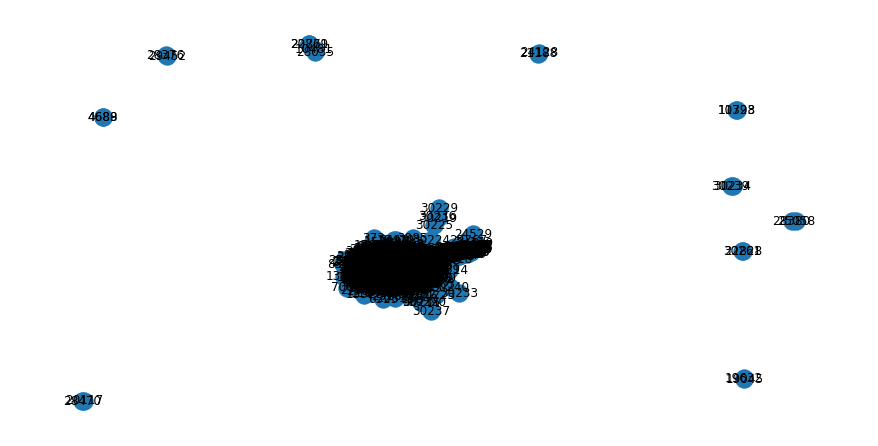

In [532]:
Ga_mh_s1 = unweighted_network(abstract_k10_h100_s1)

#### For k=10 ans s=0.1

In [529]:
abstract_k10_h100_s2 = minhashing_get_all_candidate(10, A_100, B_100, nsig_100, 0.1)

finding candidates took 2780.65438079834 seconds
found 5014 candidates using MH for k=10, s=0.1


Took 52.61404490470886s for the function


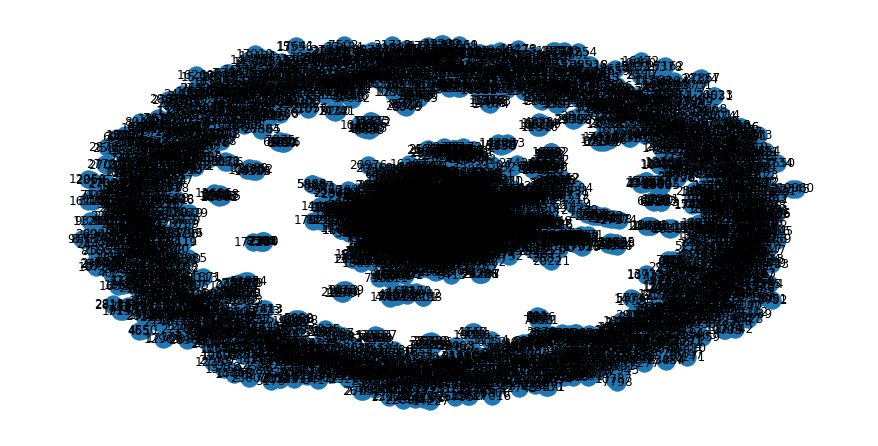

In [534]:
Ga_mh_s2 = unweighted_network(abstract_k10_h100_s2)

### Create unweighted network of similar pairs using LSH of 100 hashing functions for k=10 

#### Define a function to get all candidates of abtracts - whole sample to find similar pairs using local sensitive hashing

In [885]:
def LSH_get_all_candidate(k, A, B, nsig, bands, rows):
    signatures = []  # signatures for all files
    for text in abstract:
        shingles = get_shingles(text, k)
        signature = minhash_vectorized(shingles, A, B, nextPrime, maxShingleID, nsig)
        signatures.append(signature)
    
    # prepare data for LSH
    A2 = numpy.random.randint(0, nextPrime/2, size=(bands, rows))
    # now we need a vector of A parameters for each band
    B2 = numpy.random.randint(0, nextPrime/2, size=(bands, ))
    signatures = numpy.array(signatures).T # LSH needs a matrix of signatures, not a list of vectors
    
    Nfiles = signatures.shape[1]  # number of different files
    t = time.time()
    candidates = LSH(signatures, bands, rows, A2, B2, nextPrime, maxShingleID)
    t2 = time.time() - t
    print("finding candidates took {} seconds".format(t2))
    print("Using LSH with k={}, found {} candidates".format(k,len(candidates)))
    return candidates

In [509]:
abstract_k10_h100 = LSH_get_all_candidate(10, A_100, B_100, nsig_100, 10, 10)

finding candidates took 94.51766443252563 seconds
Using LSH with k=10, found 29 candidates


Took 0.025668621063232422s for the function


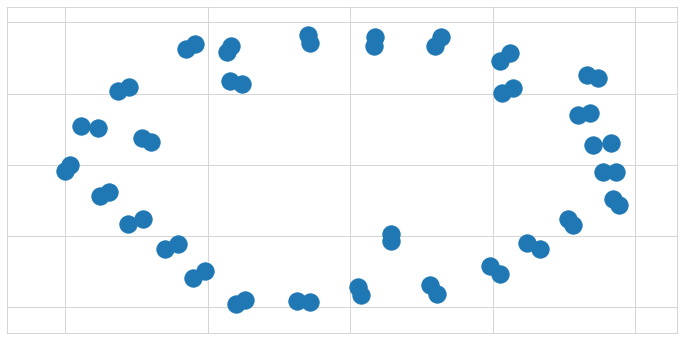

In [608]:
Ga_lsh = unweighted_network(abstract_k10_h100)

### Creating weighted network from basket of authors+editors, using A priori for support threshold of 10 as weight

In [887]:
print('There are {} nodes in the network'.format(len(L2_10)))

There are 1703 nodes in the network


#### Define a function to transform frozenset to a list

In [965]:
def frozenset_transform_list(data):
    df = pd.DataFrame(list(data), columns=['pair_01', 'pair_02'])
    values_extract = []
    for key in data.keys():
        values_extract.append(data[key])
    values = np.array(values_extract)
    df['count'] = values.tolist()
    new_list = df.values.tolist()
    
    return new_list

In [966]:
L2_10_data = frozenset_transform_list(L2_10)

In [967]:
L2_10_data[:3]

[['Pavlopoulos, John', 'Androutsopoulos, Ion', 13],
 ['Ritter, Alan', 'Xu, Wei', 19],
 ['Utiyama, Masao', 'Sumita, Eiichiro', 90]]

#### Define a function to create weighted network

In [890]:
def weighted_graph(data, N, w1):
    G = nx.Graph()
    for i in range(1, N):
        G.add_node(i)
    for n1, n2, w in data:
        if w >= w1:
            G.add_edge(n1, n2, weight=w)
    return G

In [968]:
# make the graph
N = 1703    # nodes
w1 = 10    # threshold's weight 

G_w = weighted_graph(L2_10_data, 1703, 10)

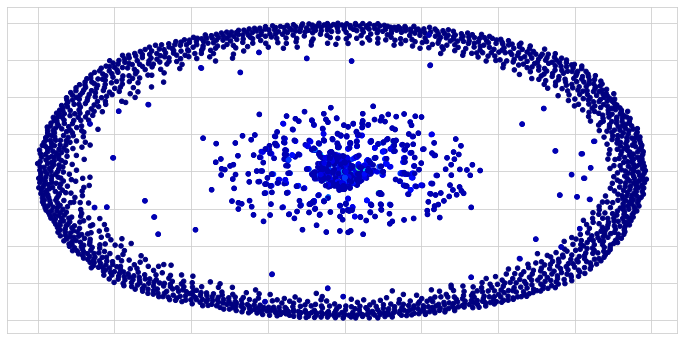

In [969]:
# show graph
node_degrees_1 = nx.degree(G_w)
node_degrees = list(dict(node_degrees_1).values())
nx.draw_networkx(
    G_w, node_size=20, edge_color="b", cmap=plt.get_cmap('jet'), node_color = node_degrees, with_labels=False
)
plt.show()

### Creating weighted network from basket of authors+editors, using A priori for support threshold of 50 as weight

In [970]:
print('There are {} nodes in the network'.format(len(L2_50)))

There are 12 nodes in the network


In [971]:
L2_50_data = frozenset_transform_list(L2_50)

In [972]:
# make the graph
N = 12    # nodes
w1 = 50    # threshold's weight 

G_w_1 = weighted_graph(L2_50_data, 12, 50)

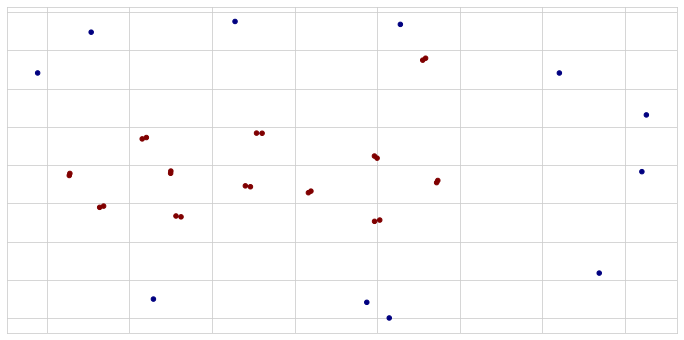

In [973]:
# show graph
node_degrees_11 = nx.degree(G_w_1)
node_degrees_n = list(dict(node_degrees_11).values())
nx.draw_networkx(
    G_w_1, node_size=20, edge_color="b", cmap=plt.get_cmap('jet'), node_color = node_degrees_n, with_labels=False
)
plt.show()

In [974]:
def heaviest(G):
    u, v, w = max(G.edges(data='weight'), key=itemgetter(2))
    return (u, v)

#### Define a function to find the communities in the network

In [897]:
def find_communities(G, b, k):
    start = time.time()
    # getting the weights
    comp_b = betweenness(G,normalized=False)
    # New graph
    Gw = nx.DiGraph()
    
    for a,b in zip(comp_b.keys(),comp_b.values()):
        Gw.add_edge(a[0], a[1], weight=b)
    
    # print(list(Gw.nodes))
    print("Clusters")
    comp_gn = girvan_newman(Gw, most_valuable_edge=heaviest)

    for communities in itertools.islice(comp_gn, k):
        sleep(2)
        print(tuple(sorted(c) for c in communities))
    print('Took {}s'.format(time.time()-start))
    
    return comp_gn

#### Find the communities for the unweighted network of similar pairs using minshashing of 100 hashing functions for k=10 and support threshold = 0.1

In [975]:
community_Ga_mh_s1 = find_communities(Ga_mh_s2, 0, 2) # find two clusters

Clusters
([0, 27, 28, 29, 43, 52, 82, 84, 85, 87, 89, 93, 95, 99, 102, 103, 104, 105, 110, 117, 125, 128, 131, 132, 154, 155, 156, 162, 165, 167, 168, 169, 177, 179, 183, 206, 221, 230, 232, 234, 269, 284, 300, 318, 331, 338, 377, 415, 478, 557, 596, 599, 600, 601, 605, 606, 607, 609, 611, 617, 623, 628, 649, 659, 736, 737, 738, 748, 750, 752, 753, 755, 756, 787, 791, 793, 795, 799, 801, 807, 808, 817, 825, 826, 827, 829, 835, 836, 838, 840, 851, 853, 855, 856, 857, 887, 893, 897, 900, 914, 915, 921, 988, 1000, 1005, 1052, 1108, 1114, 1120, 1136, 1140, 1163, 1175, 1191, 1212, 1259, 1270, 1279, 1366, 1369, 1404, 1425, 1427, 1482, 1498, 1516, 1517, 1520, 1541, 1565, 1587, 1590, 1594, 1595, 1603, 1615, 1623, 1627, 1630, 1642, 1673, 1696, 1709, 1749, 1750, 1751, 1758, 1762, 1787, 1790, 1791, 1795, 1832, 1850, 1854, 1870, 1896, 1914, 1923, 1926, 1949, 1953, 1965, 1980, 2016, 2082, 2111, 2119, 2122, 2123, 2172, 2177, 2180, 2210, 2331, 2333, 2339, 2347, 2351, 2381, 2384, 2428, 2431, 2438, 244

([0, 27, 28, 29, 43, 52, 82, 84, 85, 87, 89, 93, 95, 99, 102, 103, 104, 105, 110, 117, 125, 128, 131, 132, 154, 155, 156, 162, 165, 167, 168, 169, 177, 179, 183, 206, 221, 230, 232, 234, 269, 284, 300, 318, 331, 338, 377, 415, 478, 557, 596, 599, 600, 601, 605, 606, 607, 609, 611, 617, 623, 628, 649, 659, 736, 737, 738, 748, 750, 752, 753, 755, 756, 787, 791, 793, 795, 799, 801, 807, 808, 817, 825, 826, 827, 829, 835, 836, 838, 840, 851, 853, 855, 856, 857, 887, 893, 897, 900, 914, 915, 921, 988, 1000, 1005, 1052, 1108, 1114, 1120, 1136, 1140, 1163, 1175, 1212, 1259, 1270, 1279, 1366, 1369, 1404, 1425, 1427, 1482, 1498, 1516, 1517, 1520, 1541, 1565, 1587, 1590, 1594, 1595, 1603, 1615, 1623, 1627, 1630, 1642, 1673, 1696, 1709, 1749, 1750, 1751, 1758, 1762, 1787, 1790, 1791, 1795, 1832, 1850, 1854, 1870, 1896, 1914, 1923, 1926, 1949, 1953, 1965, 1980, 2016, 2082, 2111, 2119, 2122, 2123, 2172, 2177, 2180, 2210, 2331, 2333, 2339, 2347, 2351, 2381, 2384, 2428, 2431, 2438, 2446, 2452, 2522, 

#### Find the communities for the unweighted network of similar pairs using LSH of 100 hashing functions for k=10 and support threshold = 0.1

In [976]:
community_Ga_lsh = find_communities(Ga_lsh, 0, 2) # find two clusters

Clusters
([6330], [9646], [121, 161], [2452, 4474], [9320, 11261], [8866, 8879], [13150, 15376], [1109, 7196], [25446, 25447], [19162, 19175], [13174, 15275], [13149, 14956], [1035, 1401], [15724, 16356], [560, 1507], [21712, 22730], [12831, 13181], [15485, 17450], [20475, 22300], [35, 3026], [25435, 25553], [5981, 12611], [17862, 17931], [19045, 19632], [15457, 15477], [2749, 3923], [7798, 10787], [9108, 11241], [17478, 18151], [25153, 25970])
([6330], [9646], [121], [161], [2452, 4474], [9320, 11261], [8866, 8879], [13150, 15376], [1109, 7196], [25446, 25447], [19162, 19175], [13174, 15275], [13149, 14956], [1035, 1401], [15724, 16356], [560, 1507], [21712, 22730], [12831, 13181], [15485, 17450], [20475, 22300], [35, 3026], [25435, 25553], [5981, 12611], [17862, 17931], [19045, 19632], [15457, 15477], [2749, 3923], [7798, 10787], [9108, 11241], [17478, 18151], [25153, 25970])
Took 4.007360935211182s


#### Find the communities for the weighted network of similar pairs using A priori for support threshold of 10 and 50 as weight

In [977]:
community_G_w_1 = find_communities(G_w_1, 50, 3) # find three clusters

Clusters
(['Utiyama, Masao'], ['Sumita, Eiichiro'], ['Negri, Matteo', 'Turchi, Marco'], ['Bhattacharyya, Pushpak', 'Ekbal, Asif'], ['Che, Wanxiang', 'Liu, Ting'], ['Liu, Kang', 'Zhao, Jun'], ['Osenova, Petya', 'Simov, Kiril'], ['Wang, Haifeng', 'Wu, Hua'], ['Wei, Furu', 'Zhou, Ming'], ['Liu, Zhiyuan', 'Sun, Maosong'], ['Niehues, Jan', 'Waibel, Alex'], ['Kawahara, Daisuke', 'Kurohashi, Sadao'], ['Li, Haizhou', 'Zhang, Min'])
(['Utiyama, Masao'], ['Sumita, Eiichiro'], ['Turchi, Marco'], ['Negri, Matteo'], ['Bhattacharyya, Pushpak', 'Ekbal, Asif'], ['Che, Wanxiang', 'Liu, Ting'], ['Liu, Kang', 'Zhao, Jun'], ['Osenova, Petya', 'Simov, Kiril'], ['Wang, Haifeng', 'Wu, Hua'], ['Wei, Furu', 'Zhou, Ming'], ['Liu, Zhiyuan', 'Sun, Maosong'], ['Niehues, Jan', 'Waibel, Alex'], ['Kawahara, Daisuke', 'Kurohashi, Sadao'], ['Li, Haizhou', 'Zhang, Min'])
(['Utiyama, Masao'], ['Sumita, Eiichiro'], ['Turchi, Marco'], ['Negri, Matteo'], ['Ekbal, Asif'], ['Bhattacharyya, Pushpak'], ['Che, Wanxiang', 'Liu, T

In [978]:
community_G_w = find_communities(G_w, 10, 2) # find two clusters

Clusters
(['Androutsopoulos, Ion', 'Malakasiotis, Prodromos', 'Pavlopoulos, John'], ['Ritter, Alan', 'Xu, Wei'], ['Abdelali, Ahmed', 'Ahrens, Kathleen', 'Akhtar, Md Shad', 'Al-Badrashiny, Mohamed', 'Alkhouli, Tamer', 'Allauzen, Alexandre', 'Alva-Manchego, Fernando', 'Ananiadou, Sophia', 'Anastasopoulos, Antonios', 'Andrews, Nicholas', 'Apidianaki, Marianna', 'Arase, Yuki', 'Arranz, Victoria', 'Asahara, Masayuki', 'Attia, Mohammed', 'Aufrant, Lauriane', 'Aw, Aiti', 'Aziz, Wilker', 'Babych, Bogdan', 'Bach, Nguyen', 'Bai, Ming-Hong', 'Baldwin, Timothy', 'Ballesteros, Miguel', 'Banchs, Rafael E.', 'Bandyopadhyay, Sivaji', 'Bangalore, Srinivas', 'Bansal, Mohit', "Barr{\\'o}n-Cede{\\~n}o, Alberto", 'Basili, Roberto', 'Beck, Daniel', 'Belinkov, Yonatan', 'Bender, Oliver', 'Bentivogli, Luisa', 'Bertagna, Francesca', 'Bertoldi, Nicola', 'Besan{\\c{c}}on, Romaric', 'Bhagavatula, Chandra', 'Bhattacharyya, Pushpak', 'Bhingardive, Sudha', 'Bi, Wei', 'Birch, Alexandra', 'Bird, Steven', 'Bisazza, Ari

(['Androutsopoulos, Ion', 'Malakasiotis, Prodromos', 'Pavlopoulos, John'], ['Ritter, Alan', 'Xu, Wei'], ['Abdelali, Ahmed', 'Ahrens, Kathleen', 'Akhtar, Md Shad', 'Al-Badrashiny, Mohamed', 'Alkhouli, Tamer', 'Allauzen, Alexandre', 'Alva-Manchego, Fernando', 'Ananiadou, Sophia', 'Anastasopoulos, Antonios', 'Andrews, Nicholas', 'Apidianaki, Marianna', 'Arase, Yuki', 'Arranz, Victoria', 'Asahara, Masayuki', 'Attia, Mohammed', 'Aufrant, Lauriane', 'Aw, Aiti', 'Aziz, Wilker', 'Babych, Bogdan', 'Bach, Nguyen', 'Bai, Ming-Hong', 'Baldwin, Timothy', 'Ballesteros, Miguel', 'Banchs, Rafael E.', 'Bandyopadhyay, Sivaji', 'Bangalore, Srinivas', 'Bansal, Mohit', "Barr{\\'o}n-Cede{\\~n}o, Alberto", 'Basili, Roberto', 'Beck, Daniel', 'Belinkov, Yonatan', 'Bender, Oliver', 'Bentivogli, Luisa', 'Bertagna, Francesca', 'Bertoldi, Nicola', 'Besan{\\c{c}}on, Romaric', 'Bhagavatula, Chandra', 'Bhattacharyya, Pushpak', 'Bhingardive, Sudha', 'Bi, Wei', 'Birch, Alexandra', 'Bird, Steven', 'Bisazza, Arianna', 'B